# Sales project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales=pd.read_csv(r'C:\Users\Taniya\Downloads\supermarket_sales - Sheet1.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Check For missing data

In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in sales.columns:
    pct_missing = np.mean(sales[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Invoice ID - 0%
Branch - 0%
City - 0%
Customer type - 0%
Gender - 0%
Product line - 0%
Unit price - 0%
Quantity - 0%
Tax 5% - 0%
Total - 0%
Date - 0%
Time - 0%
Payment - 0%
cogs - 0%
gross margin percentage - 0%
gross income - 0%
Rating - 0%


In [5]:
#data contains non null values

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#abstracting month

def month_sale(value):
    return value.split('/')[0]
sales['Month']=sales['Date'].apply(lambda x: month_sale(x))
sales['Month']

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: object

In [8]:
# calculating sales

sales['Sales']=sales['Quantity']*sales['Unit price']

In [9]:
sales=sales.sort_values(by=['Sales'], inplace=False, ascending=False)

## Sales per month

([<matplotlib.axis.XTick at 0x21e18361af0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

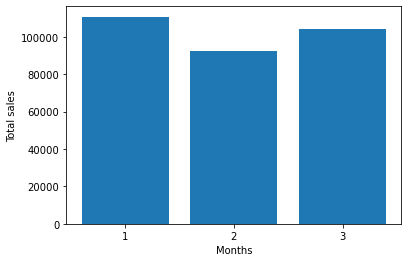

In [10]:
#maximum sales in a particular month
df= sales.groupby('Month').sum()
months=range(1,4)
plt.bar(months,df['Sales'])
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.xticks(months)

## Popular Mode of payment

([<matplotlib.axis.XTick at 0x21e188e0250>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

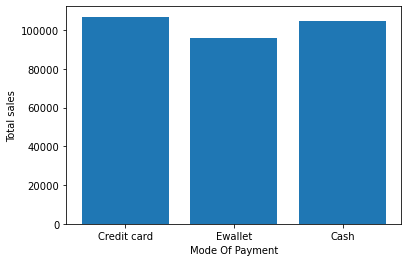

In [11]:
# Which payment mode had the most number of transaction
df= sales.groupby('Payment').sum()
pay=sales['Payment'].unique()
plt.bar(pay,df['Sales'])
plt.xlabel('Mode Of Payment')
plt.ylabel('Total sales')
plt.xticks(pay)

## Sales distribution by city

([<matplotlib.patches.Wedge at 0x21e18bc9df0>,
 [Text(0.5634539536285844, 0.9447325770504145, 'Naypyitaw'),
  Text(-1.199999999587649, 3.1458590372953374e-05, 'Yangon'),
  Text(0.5634292752593005, -0.9447472951963289, 'Mandalay')],
 [Text(0.307338520161046, 0.5153086783911351, '33%'),
  Text(-0.6999999997594617, 1.83508443842228e-05, '34%'),
  Text(0.3073250592323457, -0.5153167064707248, '33%')])

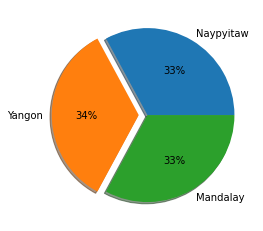

In [12]:
df=sales['City'].unique()
sale_city=sales.groupby('City').sum()
explode=[0,0.1,0]
plt.pie(sale_city['Sales'],labels=df,explode=explode,shadow = True,autopct='%1.0f%%')



## Number of purchases by each gender

([<matplotlib.axis.XTick at 0x21e18c07fd0>,
 [Text(0, 0, ''), Text(0, 0, '')])

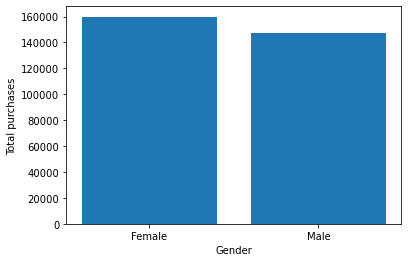

In [13]:
df=sales.groupby('Gender').sum()
gend=sales['Gender'].unique()
plt.bar(gend,df['Sales'])
plt.xlabel('Gender')
plt.ylabel('Total purchases')
plt.xticks(gend)


## Product line sales distribution

([<matplotlib.patches.Wedge at 0x21e18c97190>,
 [Text(0.9498891535584209, 0.5547166807948603, 'Fashion accessories'),
  Text(-0.01602345613047777, 1.0998832887418715, 'Food and beverages'),
  Text(-0.9747569568484531, 0.5097537396386054, 'Home and lifestyle'),
  Text(-0.9418826318120481, -0.5682051635552162, 'Sports and travel'),
  Text(-0.02807635002836156, -1.0996416318824442, 'Health and beauty'),
  Text(0.9456237583535786, -0.5619570336220137, 'Electronic accessories')],
 [Text(0.5181213564864113, 0.30257273497901466, '17%'),
  Text(-0.008740066980260601, 0.599936339313748, '17%'),
  Text(-0.5316856128264289, 0.2780474943483302, '17%'),
  Text(-0.5137541628065717, -0.30993008921193604, '15%'),
  Text(-0.015314372742742667, -0.5998045264813332, '17%'),
  Text(0.5157947772837701, -0.3065220183392801, '17%')])

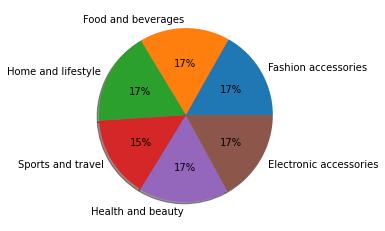

In [14]:
df=sales.groupby('Product line').sum()
prod=sales['Product line'].unique()
sale_city=sales.groupby('Sales').sum()
plt.pie(df['Sales'],labels=prod,shadow = True,autopct='%1.0f%%')




## Correlation of all Numeric values

Text(0.5, 1.0, 'Correlation matrix for Numeric Features')

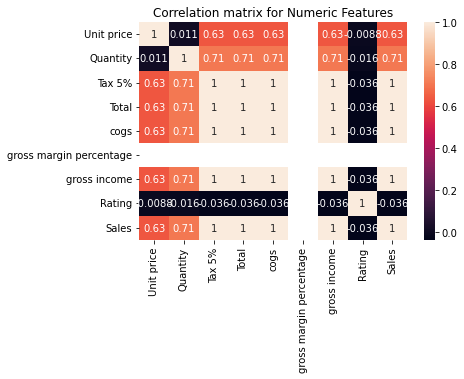

In [15]:
correlation_matrix = sales.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")



In [16]:
correlation_mat = sales.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Invoice ID  Invoice ID                 1.000000
            Branch                     0.014545
            City                       0.014545
            Customer type              0.016998
            Gender                     0.051951
                                         ...   
Sales       gross margin percentage         NaN
            gross income               1.000000
            Rating                     0.098060
            Month                      0.008785
            Sales                      1.000000
Length: 361, dtype: float64


In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)


Product line             Quantity                  -0.060490
Quantity                 Product line              -0.060490
Date                     Month                     -0.050207
Month                    Date                      -0.050207
Date                     Payment                   -0.041375
                                                      ...   
gross margin percentage  Sales                           NaN
gross income             gross margin percentage         NaN
Rating                   gross margin percentage         NaN
Month                    gross margin percentage         NaN
Sales                    gross margin percentage         NaN
Length: 361, dtype: float64


In [18]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


Invoice ID    Time            0.502380
Time          Invoice ID      0.502380
Sales         Time            0.502679
Time          Sales           0.502679
              gross income    0.502721
                                ...   
gross income  Tax 5%          1.000000
              Total           1.000000
              cogs            1.000000
Rating        Rating          1.000000
Sales         Sales           1.000000
Length: 88, dtype: float64


## Popular product line between genders

In [ ]:
df=sales.groupby(['Product line','Gender'])[["Sales"]].sum()

In [50]:
df= df.reset_index()
df

,Product line,Gender,Sales
0,Electronic accessories,Female,25811.45
1,Electronic accessories,Male,25938.58
2,Fashion accessories,Female,28988.00
3,Fashion accessories,Male,22731.90
4,Food and beverages,Female,31591.35
5,Food and beverages,Male,21879.93
6,Health and beauty,Female,17677.13
7,Health and beauty,Male,29174.05
8,Home and lifestyle,Female,28606.55
9,Home and lifestyle,Male,22690.51


<AxesSubplot:xlabel='Product line', ylabel='Sales'>

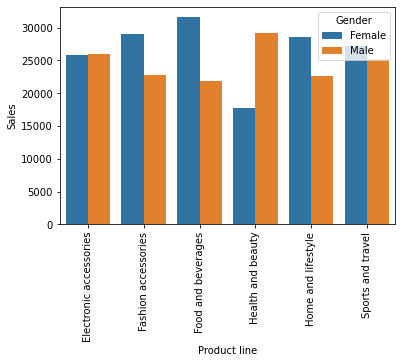

In [51]:
plt.xticks(rotation=90)
sns.barplot(data=df, x='Product line', y='Sales', hue='Gender')

## Average ratings of each Branch

In [37]:
avg_Rating= sales.groupby('Branch').mean()
Branch= sales['Branch'].unique()
avg_Rating

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Sales
Branch,,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,297.480029
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,304.640482
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,321.047348


([<matplotlib.patches.Wedge at 0x21e1d6ed130>,
 [Text(0.5421996606821399, 0.9570890909190077, 'C'),
  Text(-1.0999739684975993, 0.007567603824352258, 'A'),
  Text(0.5356023113290934, -0.9607966299373312, 'B')],
 [Text(0.29574526946298535, 0.5220485950467314, '34%'),
  Text(-0.5999858009986905, 0.004127783904192141, '33%'),
  Text(0.2921467152704146, -0.524070889056726, '34%')])

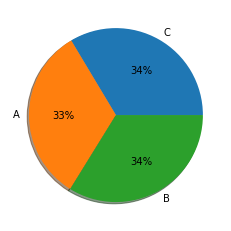

In [34]:
plt.pie(avg_Rating['Rating'],labels=Branch,shadow = True,autopct='%1.0f%%')

## Pairwise relationship between variables

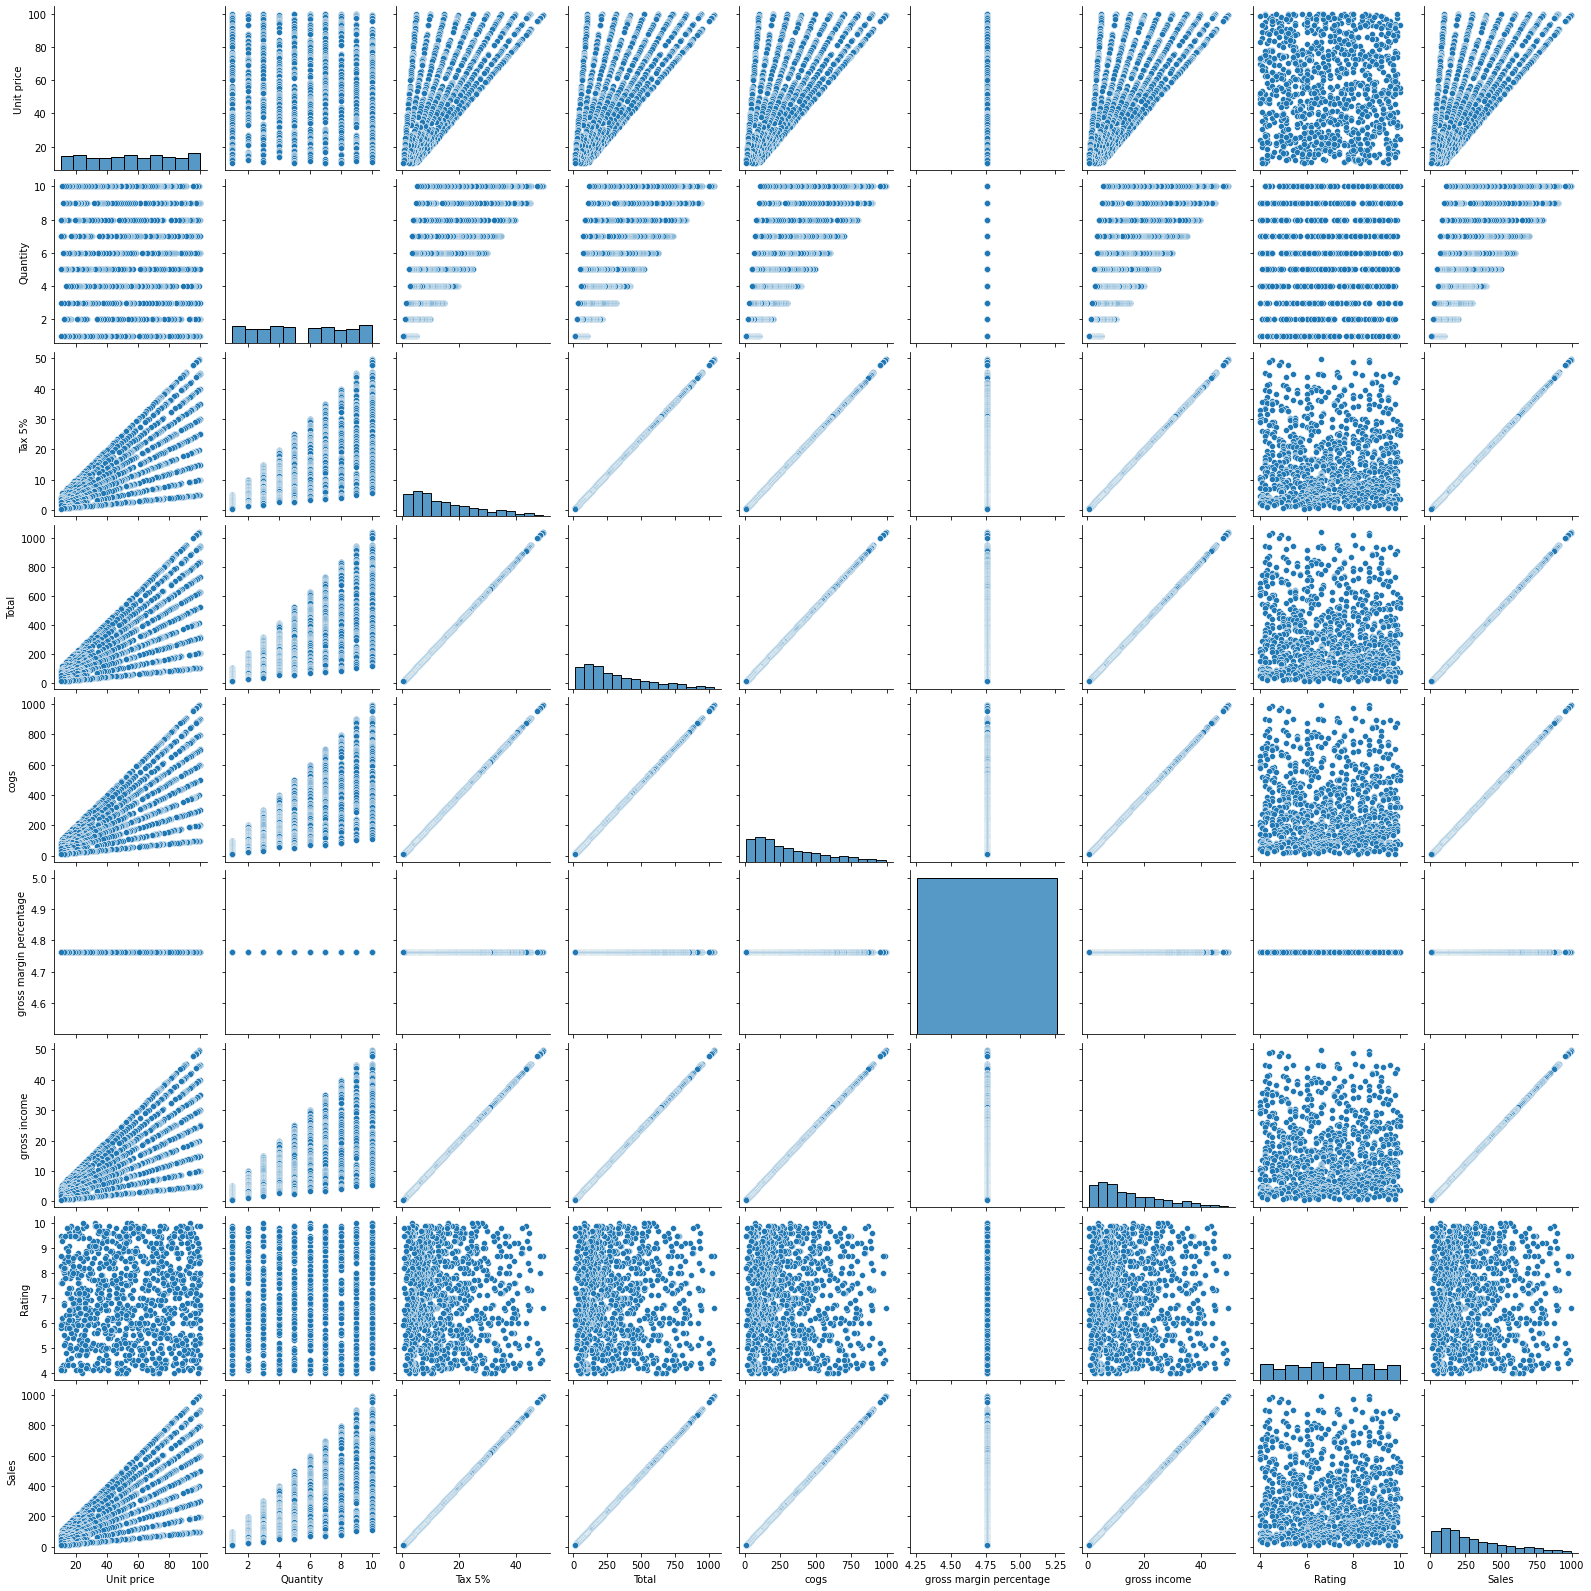

In [39]:
sns.pairplot(sales)

## Sales per shift distribution

In [59]:
def func(values):
    a=values.split(':')[0]
    if a>'15':
        return "Evening"
    elif a>='12' and a<'15':
        return "Afternoon"
    else:
        return "Morning"
sales['shift']=sales['Time'].apply(lambda x : func(x))

In [67]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales,shift
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.6500,1042.6500,2/15/2019,14:53,Credit card,993.00,4.761905,49.6500,6.6,2,993.00,Afternoon
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,2/8/2019,16:20,Credit card,989.80,4.761905,49.4900,8.7,2,989.80,Evening
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.2600,1034.4600,1/30/2019,20:23,Ewallet,985.20,4.761905,49.2600,4.5,1,985.20,Evening
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.7500,1023.7500,1/12/2019,16:18,Ewallet,975.00,4.761905,48.7500,8.0,1,975.00,Evening
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,973.80,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2/4/2019,13:38,Ewallet,13.98,4.761905,0.6990,9.8,2,13.98,Afternoon
443,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.6390,13.4190,1/8/2019,14:11,Ewallet,12.78,4.761905,0.6390,9.5,1,12.78,Afternoon
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,2/21/2019,12:38,Cash,12.54,4.761905,0.6270,8.2,2,12.54,Afternoon
629,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,1/26/2019,18:19,Credit card,12.09,4.761905,0.6045,8.2,1,12.09,Evening


([<matplotlib.axis.XTick at 0x21e28244040>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

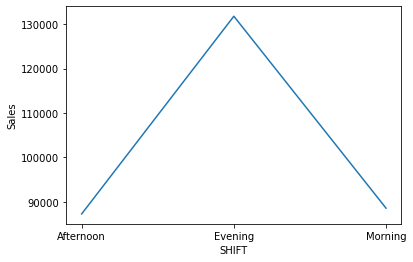

In [70]:
shift_max= sales.groupby('shift').sum()
df=shift_max.reset_index()
plt.xlabel("SHIFT")
plt.ylabel("Sales")
plt.plot(df['shift'],df['Sales'])
plt.xticks(df['shift'])